## Exploración de un fichero

Abrir el fichero para vercomo se visualiza un unico fichero y como limpiar el fichero inicial.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
root = 'España en Argentina.xls'

Abrir fichero y explorarlo

In [3]:
df_arg = pd.read_excel(root, header=1)
df_arg.head()

WARNING *** file size (32704) not 512 + multiple of sector size (512)


,Elemento,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,ENE-SEP 2020
0,NaN,NaN,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,...,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros
1,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",294.5,3109.2,2121.64,1729.88,2101.62,5186.01,5102.35,3541.88,...,177716,46944.2,9933.33,20056.9,21865.7,9417.92,2680.56,20885,NaN,5717.28
2,NaN,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,237.73,5205.75,1775.7,8870.99,139.92,766.07,1558.23,...,1307.35,0,0,433.12,0,595.79,1605.78,808.3,190.2,39.07
3,NaN,03 PESCA Y ACUICULTURA,806.69,742.72,5305.88,2932.19,3122.82,4662.34,4534.62,21775.1,...,0,0,0,1637.95,1337.91,6258.24,250,3445.53,0,0
4,NaN,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",180.15,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_arg.columns

Index(['Elemento', 'Unnamed: 1', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', 'ENE-SEP 2020'],
      dtype='object')

Eliminar la primera fila

In [5]:
df_arg_2= df_arg.drop([0], axis=0)
df_arg_2.head()

,Elemento,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,ENE-SEP 2020
1,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",294.5,3109.2,2121.64,1729.88,2101.62,5186.01,5102.35,3541.88,...,177716,46944.2,9933.33,20056.9,21865.7,9417.92,2680.56,20885,NaN,5717.28
2,NaN,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,237.73,5205.75,1775.7,8870.99,139.92,766.07,1558.23,...,1307.35,0,0,433.12,0,595.79,1605.78,808.3,190.2,39.07
3,NaN,03 PESCA Y ACUICULTURA,806.69,742.72,5305.88,2932.19,3122.82,4662.34,4534.62,21775.1,...,0,0,0,1637.95,1337.91,6258.24,250,3445.53,0,0
4,NaN,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",180.15,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,143714,NaN,0,1.43341e+07,NaN,...,1.12,930,919.45,54017.9,77549.6,0,0,0,NaN,NaN


In [6]:
# Renombrar columnas

df_arg_2.rename(columns={'Unnamed: 1':'industry',
                        'Elemento': 'country'}, inplace=True)
df_arg_2.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,ENE-SEP 2020
1,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",294.5,3109.2,2121.64,1729.88,2101.62,5186.01,5102.35,3541.88,...,177716,46944.2,9933.33,20056.9,21865.7,9417.92,2680.56,20885,NaN,5717.28
2,NaN,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,237.73,5205.75,1775.7,8870.99,139.92,766.07,1558.23,...,1307.35,0,0,433.12,0,595.79,1605.78,808.3,190.2,39.07
3,NaN,03 PESCA Y ACUICULTURA,806.69,742.72,5305.88,2932.19,3122.82,4662.34,4534.62,21775.1,...,0,0,0,1637.95,1337.91,6258.24,250,3445.53,0,0
4,NaN,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",180.15,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,143714,NaN,0,1.43341e+07,NaN,...,1.12,930,919.45,54017.9,77549.6,0,0,0,NaN,NaN


In [7]:
# Completar la columna 'Country' con el nombre del país

df_arg_2['country'] = df_arg_2['country'].replace(np.nan, 'ARGENTINA')
df_arg_2.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,ENE-SEP 2020
1,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",294.5,3109.2,2121.64,1729.88,2101.62,5186.01,5102.35,3541.88,...,177716,46944.2,9933.33,20056.9,21865.7,9417.92,2680.56,20885,NaN,5717.28
2,ARGENTINA,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,237.73,5205.75,1775.7,8870.99,139.92,766.07,1558.23,...,1307.35,0,0,433.12,0,595.79,1605.78,808.3,190.2,39.07
3,ARGENTINA,03 PESCA Y ACUICULTURA,806.69,742.72,5305.88,2932.19,3122.82,4662.34,4534.62,21775.1,...,0,0,0,1637.95,1337.91,6258.24,250,3445.53,0,0
4,ARGENTINA,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",180.15,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARGENTINA,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,143714,NaN,0,1.43341e+07,NaN,...,1.12,930,919.45,54017.9,77549.6,0,0,0,NaN,NaN


In [8]:
# Sustituir valores NaN por 0. Lo sustituimos por 0 porque ese año no hay registrado ningun valor de inversión

df_arg_2 = df_arg_2.fillna(0)
df_arg_2.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,ENE-SEP 2020
1,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",294.50,3109.20,2121.64,1729.88,2101.62,5186.01,5102.35,3541.88,...,177715.57,46944.23,9933.33,20056.92,21865.68,9417.92,2680.56,20885.00,0.0,5717.28
2,ARGENTINA,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,0.00,237.73,5205.75,1775.70,8870.99,139.92,766.07,1558.23,...,1307.35,0.00,0.00,433.12,0.00,595.79,1605.78,808.30,190.2,39.07
3,ARGENTINA,03 PESCA Y ACUICULTURA,806.69,742.72,5305.88,2932.19,3122.82,4662.34,4534.62,21775.14,...,0.00,0.00,0.00,1637.95,1337.91,6258.24,250.00,3445.53,0.0,0.00
4,ARGENTINA,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",180.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
5,ARGENTINA,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,0.00,0.00,0.00,143714.18,0.00,0.00,14334138.69,0.00,...,1.12,930.00,919.45,54017.94,77549.57,0.00,0.00,0.00,0.0,0.00


In [9]:
df_arg_2.dtypes

country          object
industry         object
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
ENE-SEP 2020    float64
dtype: object

In [10]:
# cambiar a tipo Float las columnas con los valores de la inversión

df_arg_2['1993'] = df_arg_2['1993'].astype(float)
df_arg_2['1994'] = df_arg_2['1994'].astype(float)
df_arg_2['1995'] = df_arg_2['1995'].astype(float)
df_arg_2['1996'] = df_arg_2['1996'].astype(float)
df_arg_2['1997'] = df_arg_2['1997'].astype(float)
df_arg_2['1998'] = df_arg_2['1998'].astype(float)
df_arg_2['1999'] = df_arg_2['1999'].astype(float)
df_arg_2['2000'] = df_arg_2['2000'].astype(float)
df_arg_2['2001'] = df_arg_2['2001'].astype(float)
df_arg_2['2002'] = df_arg_2['2002'].astype(float)
df_arg_2['2003'] = df_arg_2['2003'].astype(float)
df_arg_2['2004'] = df_arg_2['2004'].astype(float)
df_arg_2['2005'] = df_arg_2['2005'].astype(float)
df_arg_2['2006'] = df_arg_2['2006'].astype(float)
df_arg_2['2007'] = df_arg_2['2007'].astype(float)
df_arg_2['2008'] = df_arg_2['2008'].astype(float)
df_arg_2['2009'] = df_arg_2['2009'].astype(float)
df_arg_2['2010'] = df_arg_2['2010'].astype(float)
df_arg_2['2011'] = df_arg_2['2011'].astype(float)
df_arg_2['2012'] = df_arg_2['2012'].astype(float)
df_arg_2['2013'] = df_arg_2['2013'].astype(float)
df_arg_2['2014'] = df_arg_2['2014'].astype(float)
df_arg_2['2015'] = df_arg_2['2015'].astype(float)
df_arg_2['2016'] = df_arg_2['2016'].astype(float)
df_arg_2['2017'] = df_arg_2['2017'].astype(float)
df_arg_2['2018'] = df_arg_2['2018'].astype(float)
df_arg_2['2019'] = df_arg_2['2019'].astype(float)
df_arg_2['ENE-SEP 2020'] = df_arg_2['ENE-SEP 2020'].astype(float)




In [11]:
df_arg_2.dtypes

country          object
industry         object
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
ENE-SEP 2020    float64
dtype: object

In [12]:
#sns.pairplot(df_arg_2)

In [13]:
df_arg_2.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,ENE-SEP 2020
1,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",294.50,3109.20,2121.64,1729.88,2101.62,5186.01,5102.35,3541.88,...,177715.57,46944.23,9933.33,20056.92,21865.68,9417.92,2680.56,20885.00,0.0,5717.28
2,ARGENTINA,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,0.00,237.73,5205.75,1775.70,8870.99,139.92,766.07,1558.23,...,1307.35,0.00,0.00,433.12,0.00,595.79,1605.78,808.30,190.2,39.07
3,ARGENTINA,03 PESCA Y ACUICULTURA,806.69,742.72,5305.88,2932.19,3122.82,4662.34,4534.62,21775.14,...,0.00,0.00,0.00,1637.95,1337.91,6258.24,250.00,3445.53,0.0,0.00
4,ARGENTINA,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",180.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
5,ARGENTINA,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,0.00,0.00,0.00,143714.18,0.00,0.00,14334138.69,0.00,...,1.12,930.00,919.45,54017.94,77549.57,0.00,0.00,0.00,0.0,0.00


In [14]:
df_arg_3 = df_arg_2.melt(['industry','country'])

In [15]:
df_arg_3.head()

,industry,country,variable,value
0,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",ARGENTINA,1993,294.50
1,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,ARGENTINA,1993,0.00
2,03 PESCA Y ACUICULTURA,ARGENTINA,1993,806.69
3,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",ARGENTINA,1993,180.15
4,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,ARGENTINA,1993,0.00


In [16]:
df_arg_3 = df_arg_3[['variable','value','country', 'industry']]
df_arg_3.head()

,variable,value,country,industry
0,1993,294.50,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1,1993,0.00,ARGENTINA,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
2,1993,806.69,ARGENTINA,03 PESCA Y ACUICULTURA
3,1993,180.15,ARGENTINA,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
4,1993,0.00,ARGENTINA,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [17]:
df_arg_3.rename(columns={'variable':'year',
                        'value': 'investment'}, inplace=True)
df_arg_3.head()

,year,investment,country,industry
0,1993,294.50,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1,1993,0.00,ARGENTINA,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
2,1993,806.69,ARGENTINA,03 PESCA Y ACUICULTURA
3,1993,180.15,ARGENTINA,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
4,1993,0.00,ARGENTINA,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


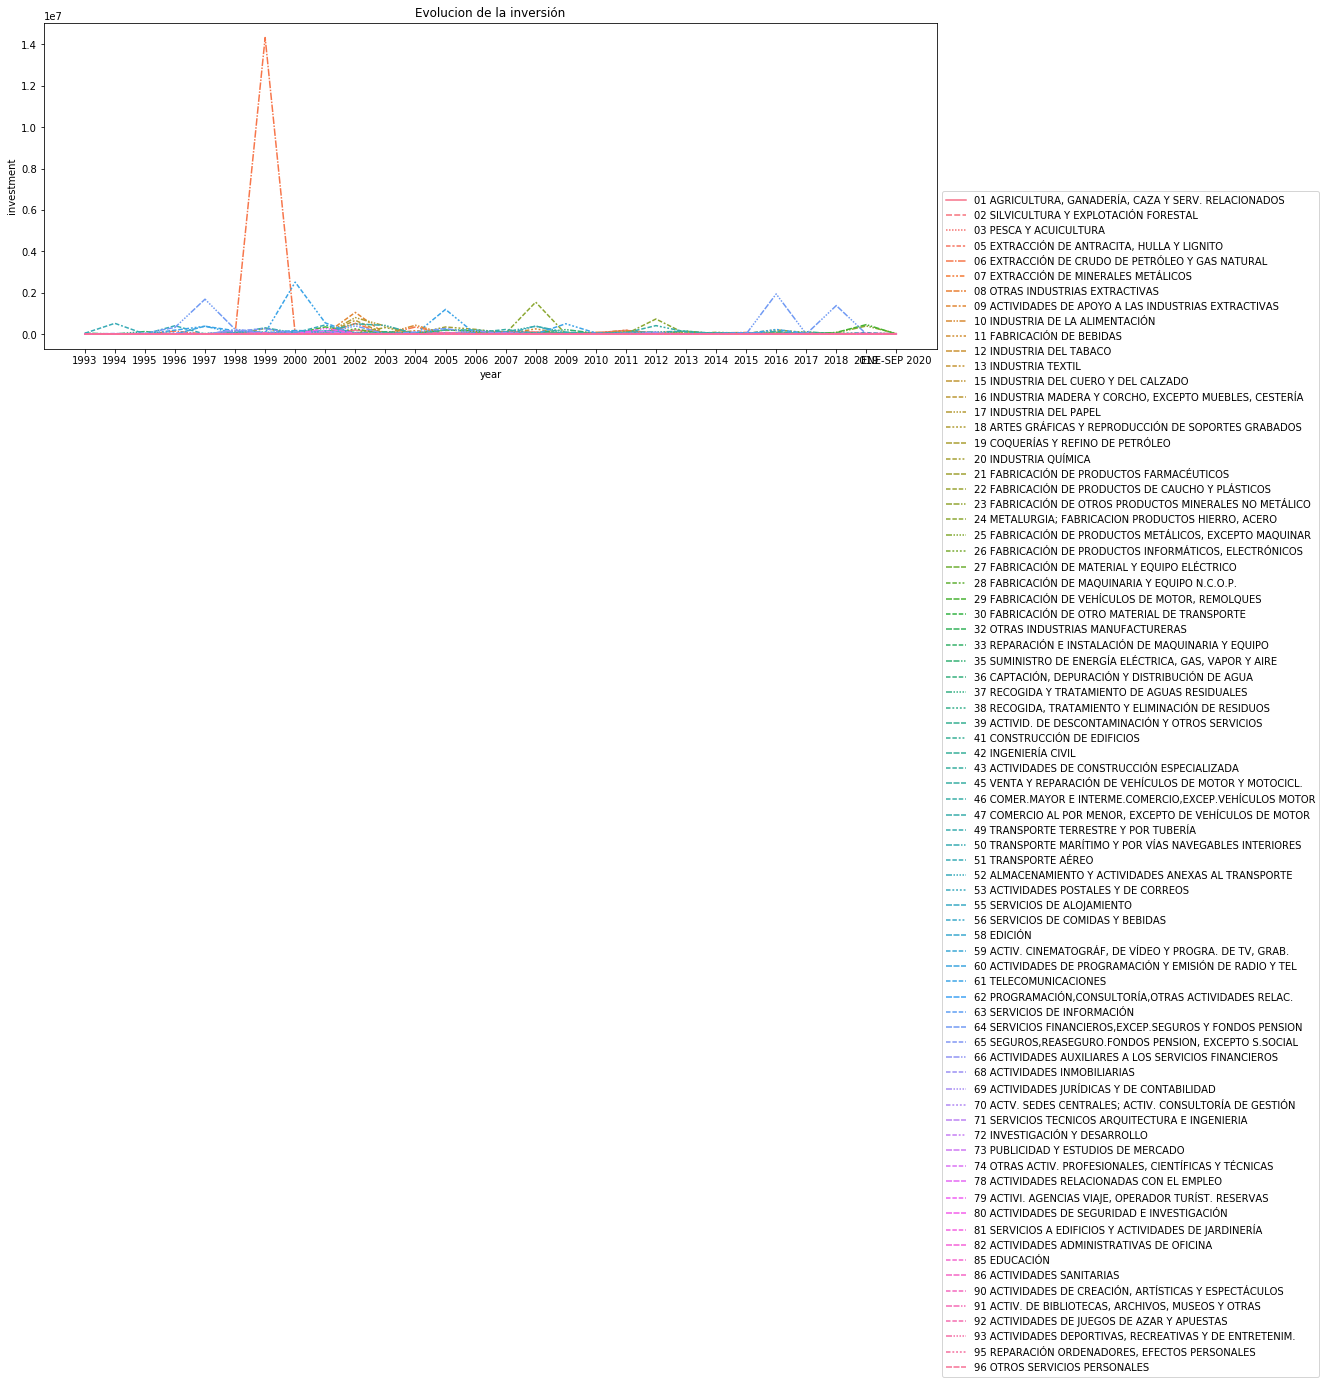

In [35]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_arg_3, x='year', y='investment', hue='industry', style='industry');
plt.title('Evolucion de la inversión por sector')
plt.legend(loc='best', bbox_to_anchor=(1, 0., 0. ,0.5))

In [74]:
lr = LinearRegression()
tree = DecisionTreeRegressor()

In [52]:
df_arg_sum = df_arg_3.groupby('year')['investment'].sum().reset_index()
df_arg_sum.head()

,year,investment
0,1993,122415.35
1,1994,581152.83
2,1995,229211.55
3,1996,1179473.44
4,1997,2551725.40


In [67]:
df_arg_sum.dtypes

year           object
investment    float64
dtype: object

In [66]:
df_arg_sum['year'] = df_arg_sum['year'].astype(str)

Text(0.5, 1.0, 'Evolucion de la inversión total del país')

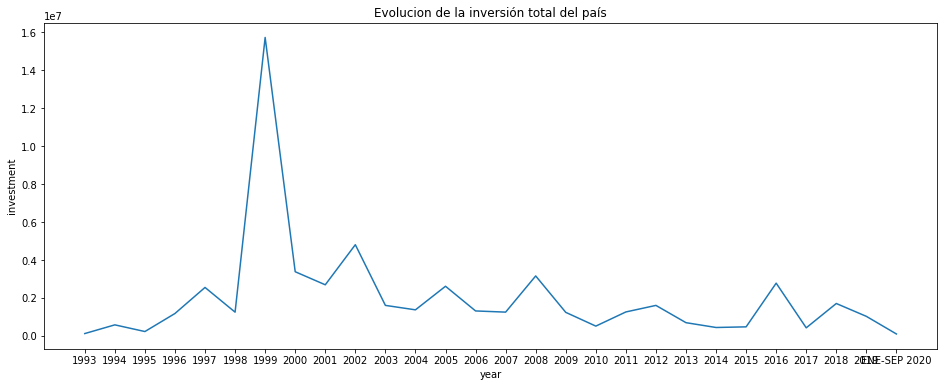

In [68]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_arg_sum, x='year', y='investment')
plt.title('Evolucion de la inversión total del país')

In [69]:
xs = df_arg_sum['year']
ys = df_arg_sum['investment']

In [70]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys)

In [75]:
tree.fit(xs_train, ys_train)
y_hat = tree.predict(xs_test)

ValueError: could not convert string to float: 'ENE-SEP 2020'